# Analiză Exploratorie a Datelor (EDA) - Churn Bancar

**Obiectiv:** Înțelegerea structurii setului de date, identificarea distribuțiilor și a relațiilor dintre caracteristicile clienților și variabila țintă `Exited` (Churn).

**Dataset:** Informații despre clienții băncii (Scor credit, Geografie, Gen, Vârstă, Balanță, etc.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

df = pd.read_csv('data/Churn_Modelling.csv')

print("Dimensiunea setului de date:", df.shape)
df.head()

Dimensiunea setului de date: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 1. Curățarea Datelor
Eliminăm coloanele care nu aduc valoare predictivă (identificatori unici sau nume): `RowNumber`, `CustomerId`, `Surname`.

In [2]:
# Eliminarea coloanelor irelevante
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Verificarea tipurilor de date și a valorilor lipsă
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## 2. Analiza Variabilei Țintă (Exited)
Verificăm dacă setul de date este echilibrat.
* `0`: Clientul a rămas
* `1`: Clientul a plecat (Churn)

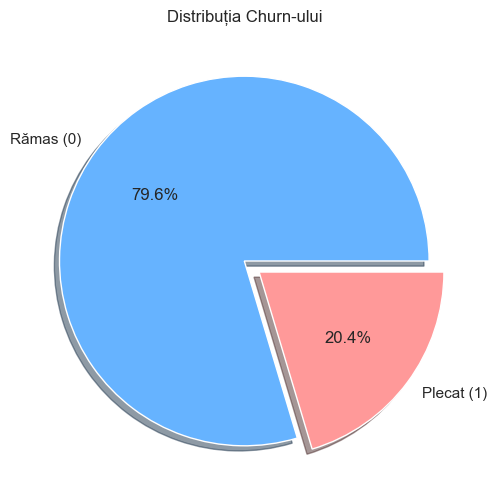

In [3]:
plt.figure(figsize=(6, 6))
df_clean['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                       labels=['Rămas (0)', 'Plecat (1)'],
                                       colors=['#66b3ff','#ff9999'],
                                       explode=[0, 0.1], shadow=True)
plt.title('Distribuția Churn-ului')
plt.ylabel('')
plt.show()

**Observație:** Avem un set de date **dezechilibrat** (aprox. 80% vs 20%). Aceasta justifică necesitatea utilizării **SMOTE** în etapele viitoare ale proiectului pentru a echilibra clasele.

## 3. Analiza Variabilelor Categorice
Analizăm impactul `Geography` și `Gender` asupra ratei de churn.

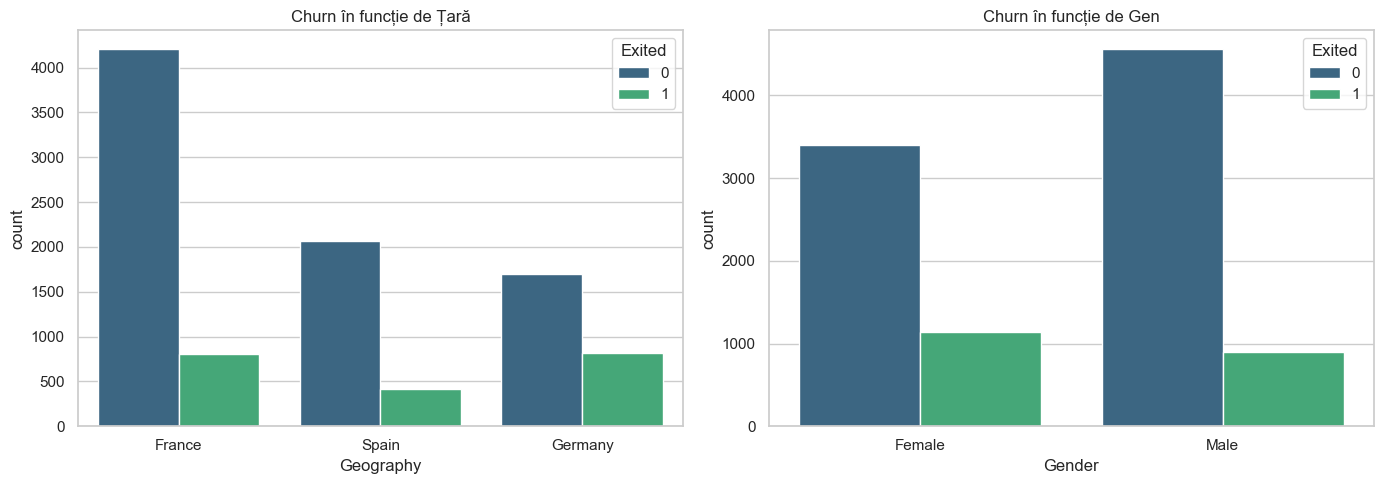

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn pe Geografie
sns.countplot(x='Geography', hue='Exited', data=df_clean, ax=axes[0], palette='viridis')
axes[0].set_title('Churn în funcție de Țară')

# Churn pe Gen
sns.countplot(x='Gender', hue='Exited', data=df_clean, ax=axes[1], palette='viridis')
axes[1].set_title('Churn în funcție de Gen')

plt.tight_layout()
plt.show()

**Insight-uri:**
1.  **Germania** are o rată de churn vizibil mai mare comparativ cu Franța și Spania.
2.  **Femeile** tind să părăsească banca într-o proporție mai mare decât bărbații.
Aceste observații sugerează un potențial **bias** în date (demografic și geografic).

## 4. Analiza Variabilelor Numerice
Investigăm distribuția variabilelor continue (`Age`, `Balance`, `CreditScore`) separate pe clasele de Churn.

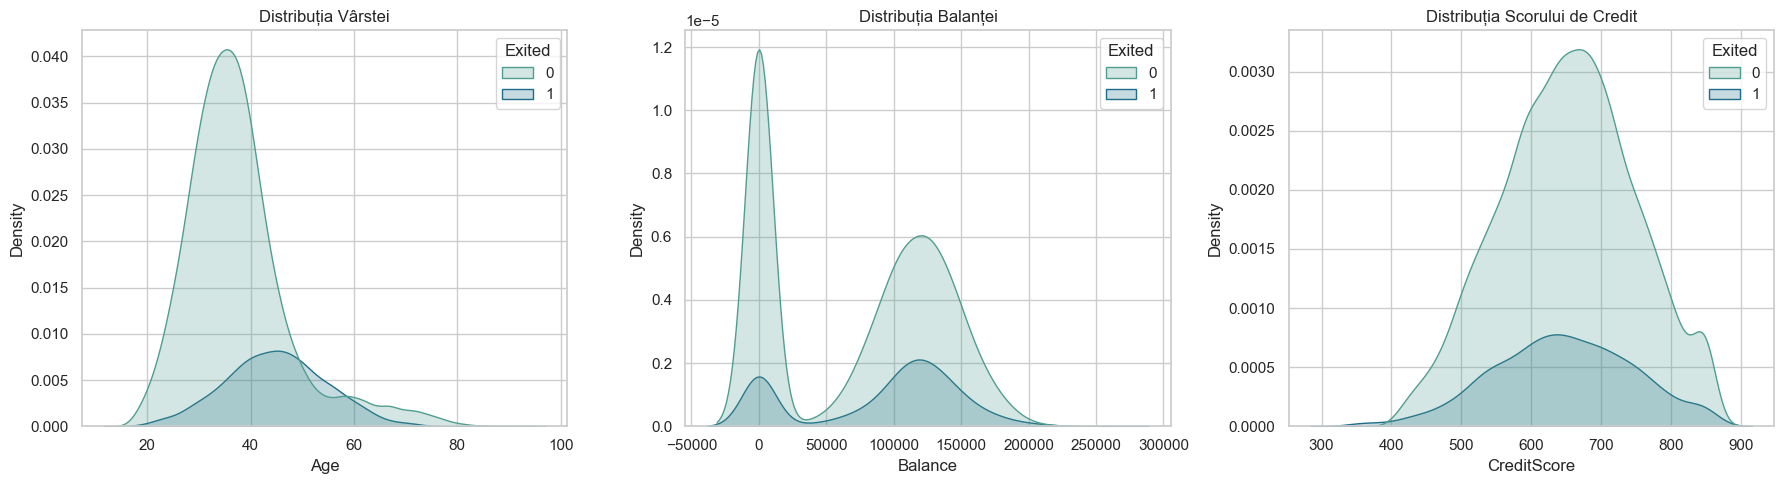

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Vârstă
sns.kdeplot(data=df_clean, x='Age', hue='Exited', fill=True, ax=axes[0], palette='crest')
axes[0].set_title('Distribuția Vârstei')

# Balanță
sns.kdeplot(data=df_clean, x='Balance', hue='Exited', fill=True, ax=axes[1], palette='crest')
axes[1].set_title('Distribuția Balanței')

# Scor Credit
sns.kdeplot(data=df_clean, x='CreditScore', hue='Exited', fill=True, ax=axes[2], palette='crest')
axes[2].set_title('Distribuția Scorului de Credit')

plt.tight_layout()
plt.show()

**Insight-uri Cheie:**
* **Vârsta:** Clienții mai în vârstă (40-50 ani) au o tendință mai mare de churn față de tineri.
* **Balanța:** Distribuția este bimodală. Un număr mare de clienți au balanță 0 (probabil inactivi), dar cei cu balanță pozitivă mare au, surprinzător, o rată de churn ridicată.
* **Scorul de Credit:** Nu pare să influențeze major decizia de a pleca (distribuțiile se suprapun).

## 5. Matricea de Corelație
Vizualizăm relațiile liniare dintre variabile.

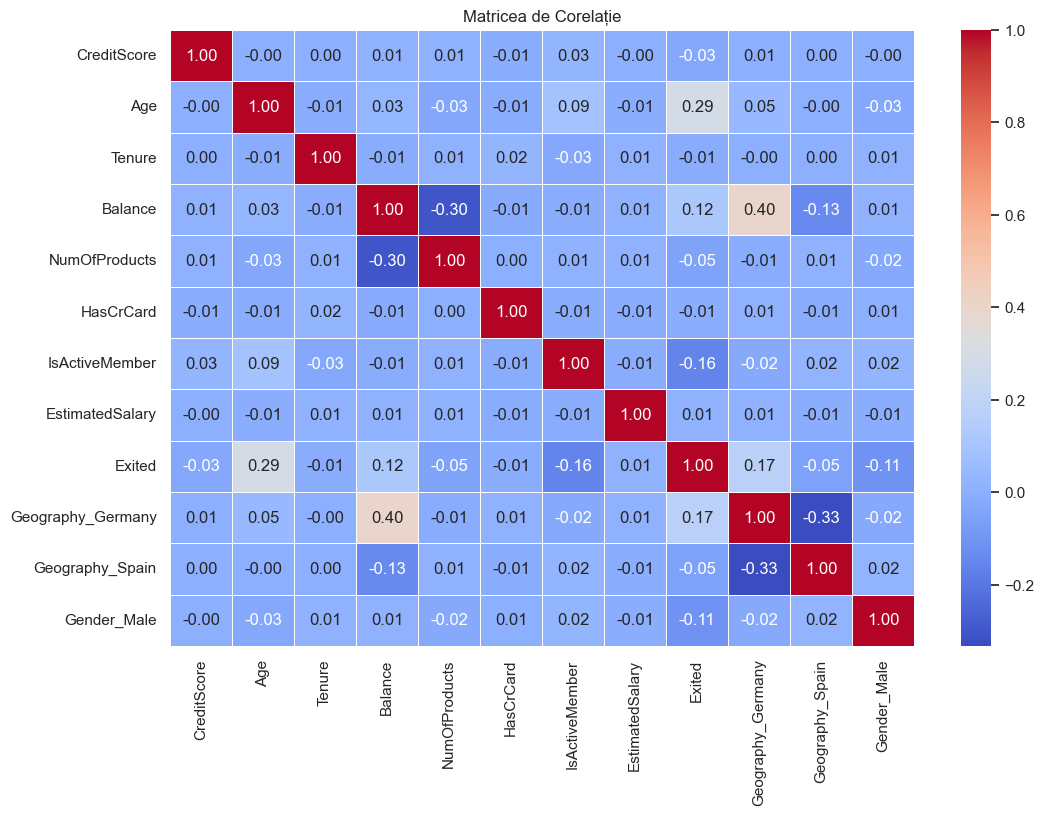

In [6]:
# Encoding simplu pentru vizualizare corelații (One-Hot Encoding)
df_encoded = pd.get_dummies(df_clean, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matricea de Corelație')
plt.show()

In [7]:
df.to_csv("data/preprocessed.csv", index=False)

## Concluzii EDA

1.  **Imbalance:** Setul este dezechilibrat (20% Churn), necesitând tehnici de resampling (SMOTE).
2.  **Factori de risc:** Vârsta înaintată, locuința în Germania și soldul bancar ridicat sunt corelate pozitiv cu plecarea clienților.